### 뉴스, 트위터, View, 종목토론실 합치기

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 뉴스 파일 불러오기
news_train = pd.read_csv('./data/뉴스_train_data.csv')
news_train = news_train.drop('Unnamed: 0', axis=1)

news_test = pd.read_csv('./data/뉴스_test_data.csv')
news_test = news_test.drop('Unnamed: 0', axis=1)

# date 형태 맞추기 위해 rstrip 시행
da_li = []

for i in news_train['date']:
    i = i.rstrip('.')
    da_li.append(i)
    
news_train['date'] = da_li

### test 도 똑같이!!!
da_list = []

for i in news_test['date']:
    i = i.rstrip('.')
    da_list.append(i)
    
news_test['date'] = da_list

print(news_train)
print(news_test)

             date                           text  score  senti
0      2020.01.01             네이버카카오 작년 연매출 사상최대      1      1
1      2020.01.01       한진네이버카카오두산…국민연금 수익률 ‘효자’      2      1
2      2020.01.01                   백브리핑 돈보다 금배지      1      1
3      2020.01.01   게임위 GO 애플 STOP19금 게임 이중검열 논란     -2     -1
4      2020.01.01   달린 거리만큼 보험료 내는 ‘디지털 車보험’ 나온다      0      0
...           ...                            ...    ...    ...
11459  2021.12.31           운수화학백화점 코로나 2년 반전스토리     -1     -1
11460  2021.12.31    삼천피 못지킨 2021 증시…그래도 천스닥은 꿋꿋     -1     -1
11461  2021.12.31  견제장치 없어 ‘표적수사’ 폭주… 공수처 폐지론 확산     -3     -1
11462  2021.12.31                 연말 기업 신용등급 줄상향      1      1
11463  2021.12.31   동학서학개미 올해 주식 100조원 어치 쓸어 담았다      0      0

[11464 rows x 4 columns]
            date                                   text  score  senti
0     2022.01.02  ‘신규확진 7천명’인데…오미크론 대응 준비 안 된 ‘호흡기 클리닉’     -1     -1
1     2022.01.02        한화손보 모바일 가입 간소화…디지털 전용 운전자보험 판매      1      1
2     20

In [4]:
# 종목토론실 파일 불러오기
talk_train = pd.read_csv('./data/train_감정점수합계_종목토론실.csv')
talk_train = talk_train.drop('Unnamed: 0', axis=1)

talk_test = pd.read_csv('./data/test_감정점수합계_종목토론실.csv')
talk_test = talk_test.drop('Unnamed: 0', axis=1)

# 날짜 형식 안 맞음 --> 뉴스랑 통일시키기
date_li = []

for i in talk_train['date']:
    i = i.replace('-','.')
    date_li.append(i)
talk_train['date'] = date_li

talk_train = talk_train.sort_values(by='date')

# 분류시 수치화 되어야 하므로 긍/부/중 -> 1,-1,0으로 바꿈
sort_li = []

for i in talk_train['senti']:
    if i == 'pos':
        sort_li.append('1')
    elif i == 'neu' :
        sort_li.append('0')
    else:
        sort_li.append('-1')
        
talk_train['senti'] = sort_li

#### test도 똑같이!!!!
date_list = []

for i in talk_test['date']:
    i = i.replace('-','.')
    i
    date_list.append(i)
talk_test['date'] = date_list

talk_test = talk_test.sort_values(by='date')

sort_list = []

for i in talk_test['senti']:
    if i == 'pos':
        sort_list.append('1')
    elif i == 'neu' :
        sort_list.append('0')
    else:
        sort_list.append('-1')
        
talk_test['senti'] = sort_list

print(talk_train)
print(talk_test)

              date                          text  score senti
101675  2020.05.28                    네이버 따라 오르자      1     1
101551  2020.05.28                호재가 계속있네 고급정보다      1     1
101550  2020.05.28  오랜 주주로써 애기합니다  시드만 계속 늘리고 홀딩      1     1
101549  2020.05.28    속보    전인대  홍콩 국가보안법 초안  가결      0     0
101548  2020.05.28            카카오는 수급만 믿고 들고가면됨       3     1
...            ...                           ...    ...   ...
22      2021.12.31             시총이   조인데 배당금   원      0     0
24      2021.12.31           이야 진짜 이렇게까지 쓰레기일줄이야     -3    -1
25      2021.12.31        삭제된 게시물의 답글 밥은 먹고 다니냐       1     1
13      2021.12.31                  대형주 월봉  선 터치      1     1
0       2021.12.31                       안티들만 있네     -1    -1

[101676 rows x 4 columns]
             date                     text  score senti
24343  2022.01.01     이재명 아들 성매매해도 이재명이 낳다      0     0
24327  2022.01.01            카카오 올해  십 간다       1     1
24328  2022.01.01                     기대되네      1     1
24329

In [5]:
# View 파일 불러오기
view_train = pd.read_csv('./data/train_감정점수합계_View.csv')
view_train = view_train.drop('Unnamed: 0', axis=1)

view_test = pd.read_csv('./data/test_감정점수합계_View.csv')
view_test = view_test.drop('Unnamed: 0', axis=1)

# 날짜 형식 안 맞음 --> 뉴스랑 통일시키기
date_li = []

for i in view_train['date']:
    i = i.replace('-','.')
    date_li.append(i)
view_train['date'] = date_li

view_train = view_train.sort_values(by='date')

# 분류시 수치화 되어야 하므로 긍/부/중 -> 1,-1,0으로 바꿈
sort_li = []

for i in view_train['senti']:
    if i == 'pos':
        sort_li.append('1')
    elif i == 'neu' :
        sort_li.append('0')
    else:
        sort_li.append('-1')
        
view_train['senti'] = sort_li

#### test도 똑같이!!!!
date_list = []

for i in view_test['date']:
    i = i.replace('-','.')
    i
    date_list.append(i)
view_test['date'] = date_list

view_test = view_test.sort_values(by='date')

sort_list = []

for i in view_test['senti']:
    if i == 'pos':
        sort_list.append('1')
    elif i == 'neu' :
        sort_list.append('0')
    else:
        sort_list.append('-1')
        
view_test['senti'] = sort_list

print(view_train)
print(view_test)

          date                                               text  score senti
31  2020.04.17    현재가          원          목표가          원      ...     27     1
45  2020.05.07  카카오               잠정실적이 발표되었습니다  매출액       억원 ...     14     1
27  2020.07.09  기업개요     년  월   일에 주식회사 다음커뮤니케이션으로 설립되었으며     ...    143     1
23  2020.08.05  요즘 카톡 안쓰는 분 계신가요     이제는 우리 생활에 너무나 가까워진 카카오  ...     41     1
50  2020.08.27  안녕하세요 주린이 남자입니다  태풍이 그래도 생각보다 크게  상처는 안주는듯 합니다...      3     1
6   2020.08.31  카카오 주가의 흐름을 살펴보면        원으로 개장해서장중 한때        원...      7     1
54  2020.08.31  안녕하세요 주경쌤   오늘도 라방 감사히 들었습니다      네이버 검색 중    ...      5     1
3   2020.11.06  카카오                    만원 상향     믿고 보는 실적   분기...     39     1
20  2020.11.09    기사요약교보증권 박지원 애널리스트매수의견     유지  목표주가        원...     22     1
19  2020.12.04  오늘 추천할 종목은 코로나  로로 인해 사회적 거리두기가 일상화되고 재택근무가 늘어...     71     1
25  2020.12.16                                         월 이벤트  ...     13     1
49  2020.12.21   관종은 프로님의 보유종목  저점매수 가능한 종목  신규매수 가능

In [6]:
# 트위터 파일 불러오기
twitter_train = pd.read_csv('./data/train_감정점수합계_트위터.csv')
twitter_train = twitter_train.drop('Unnamed: 0', axis=1)
twitter_train.rename(columns = {'Datetime':'date','Text':'text','sentiment':'senti'},inplace=True)

twitter_test = pd.read_csv('./data/test_감정점수합계_트위터.csv')
twitter_test = twitter_test.drop('Unnamed: 0', axis=1)
twitter_test.rename(columns = {'Datetime':'date','Text':'text','sentiment':'senti'},inplace=True)


# 날짜 형식 안 맞음 --> 뉴스랑 통일시키기
date_li = []

for i in twitter_train['date']:
    i = i.replace('-','.')
    date_li.append(i)
twitter_train['date'] = date_li

twitter_train = twitter_train.sort_values(by='date')

# 분류시 수치화 되어야 하므로 긍/부/중 -> 1,-1,0으로 바꿈
sort_li = []

for i in twitter_train['senti']:
    if i == 'pos':
        sort_li.append('1')
    elif i == 'neu' :
        sort_li.append('0')
    else:
        sort_li.append('-1')
        
twitter_train['senti'] = sort_li

#### test도 똑같이!!!!
date_list = []

for i in twitter_test['date']:
    i = i.replace('-','.')
    i
    date_list.append(i)
twitter_test['date'] = date_list

twitter_test = twitter_test.sort_values(by='date')

sort_list = []

for i in twitter_test['senti']:
    if i == 'pos':
        sort_list.append('1')
    elif i == 'neu' :
        sort_list.append('0')
    else:
        sort_list.append('-1')
        
twitter_test['senti'] = sort_list

print(twitter_train)
print(twitter_test)

            date                                               text  score  \
3174  2020.01.02    기업핵심분석자료   알짜중견중소   곳 가이드북  초봉      만원 등 대기업...      1   
3173  2020.01.03  현재 전 세계  만개 이상의 기업이  시프티 를 이용하고 있다  카카오  위워크  ...      1   
3171  2020.01.05  아맞아 확실히   는 시대상을 반영하는게 정보기업이 얼마나 무서운지 드러냄 실제로 ...     -2   
3172  2020.01.05  몇년전부터 그래서 중국계 기업 쓰지말라고 정보 다 넘어간다고 얘기 돌았었음 카카오뿐...      1   
3170  2020.01.06  의료   기업 루닛     억원 규모 시리즈  투자 유치    역대 최대    인베...      5   
...          ...                                                ...    ...   
8     2021.12.30  크립토시대  네이버페이 말고 라인코인  카카오페이말고 클레이  원화충전결제에서 코인...      5   
3     2021.12.31     해시드벤처스는     년 설립하자마자 운용사 출자금과 민간자금만으로 이루어진 ...      3   
2     2021.12.31  해 넘긴 김범수 의장의 약속    카카오 상생안  오리무중              ...      4   
1     2021.12.31  올해 다 지나니까 생각나는데 여름에 새일센터에서 구직 프로그램 소개 받을 때 카카오...      0   
0     2021.12.31      년 목표    롤링필로우 매출 궤도에 올리기    카카오메이커스랑 카카오선물...      3   

     senti  
3174     1  
3173     1  
3171    -1  
3172     1 

### 각각 일자별 결합 및 그래프 그려보기

In [7]:
# 그래프에서 한글 폰트가 깨질 경우 실행
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

<AxesSubplot:title={'center':'뉴스 train 데이터 일자별 긍부정 시각화'}, xlabel='date'>

c:\users\imj\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


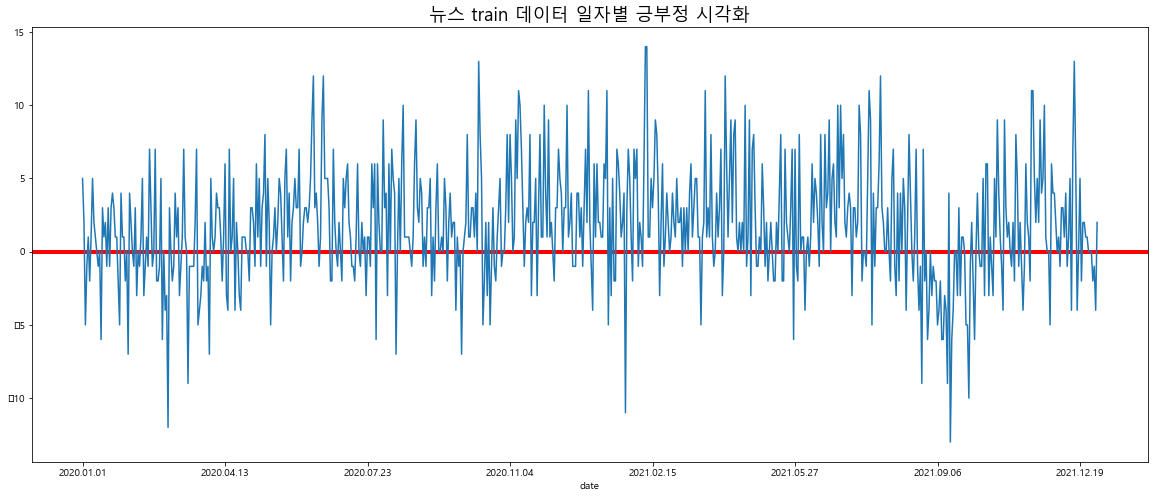

In [8]:
plt.figure(figsize=(20,8))
plt.title("뉴스 train 데이터 일자별 긍부정 시각화", fontsize=18)
plt.axhline(y=0, color='r', linewidth=4)
news_train.groupby('date')['senti'].sum().plot()

In [9]:
### 뉴스 train 데이터에서 가장 수치가 높은 날과 낮은 날 뽑기
x = news_train.groupby('date')['senti'].sum()
x = pd.DataFrame(x)
x = x.reset_index()
x[x['senti'] == news_train.groupby('date')['senti'].sum().min()]
# 가장 수치가 낮은 날 : 21.9.15

x[x['senti'] == news_train.groupby('date')['senti'].sum().max()]
# 가장 수치가 높은 날 : 21.2.9 / 21.2.10

,date,senti
395,2021.02.09,14
396,2021.02.10,14


TypeError: no numeric data to plot

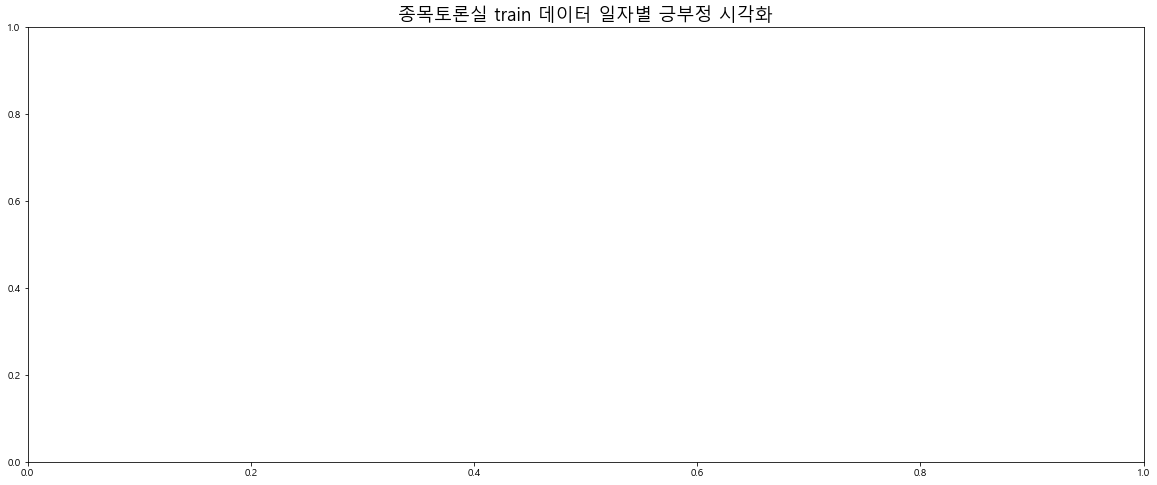

In [10]:
### 종목토론실
# talk_train['senti']= talk_train['senti'].astype(int)
# talk_train['senti'][0].dtype

plt.figure(figsize=(20,8))
plt.title("종목토론실 train 데이터 일자별 긍부정 시각화", fontsize=18)
talk_train.groupby('date')['senti'].sum().plot()

<AxesSubplot:title={'center':'네이버 View train 데이터 일자별 긍부정 시각화'}, xlabel='date'>

c:\users\imj\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


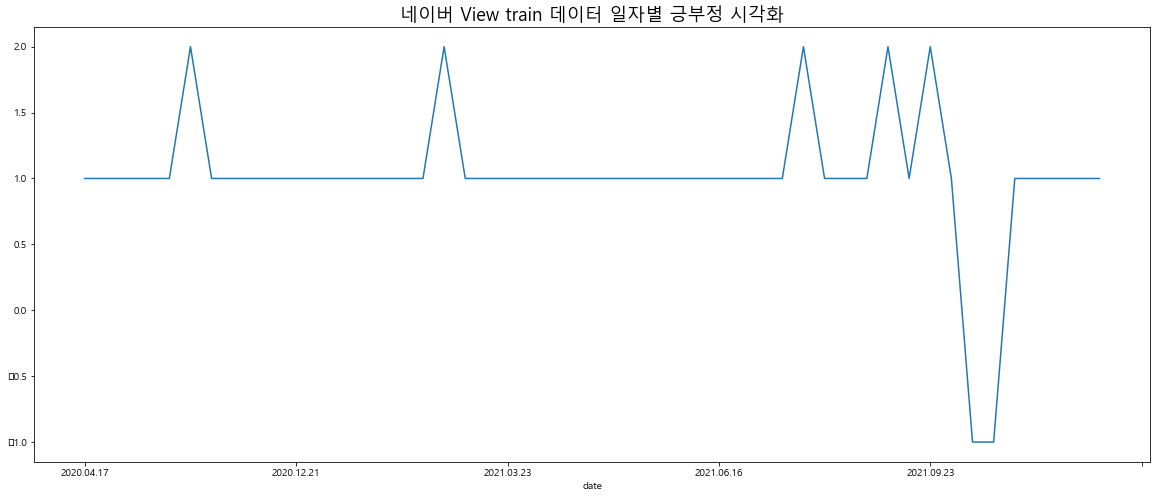

In [120]:
### 뷰
# view_train['senti']= view_train['senti'].astype(int)
# view_train['senti'][0].dtype

plt.figure(figsize=(20,8))
plt.title("네이버 View train 데이터 일자별 긍부정 시각화", fontsize=18)
view_train.groupby('date')['senti'].sum().plot()

<AxesSubplot:title={'center':'twitter train 데이터 일자별 긍부정 시각화'}, xlabel='date'>

c:\users\imj\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


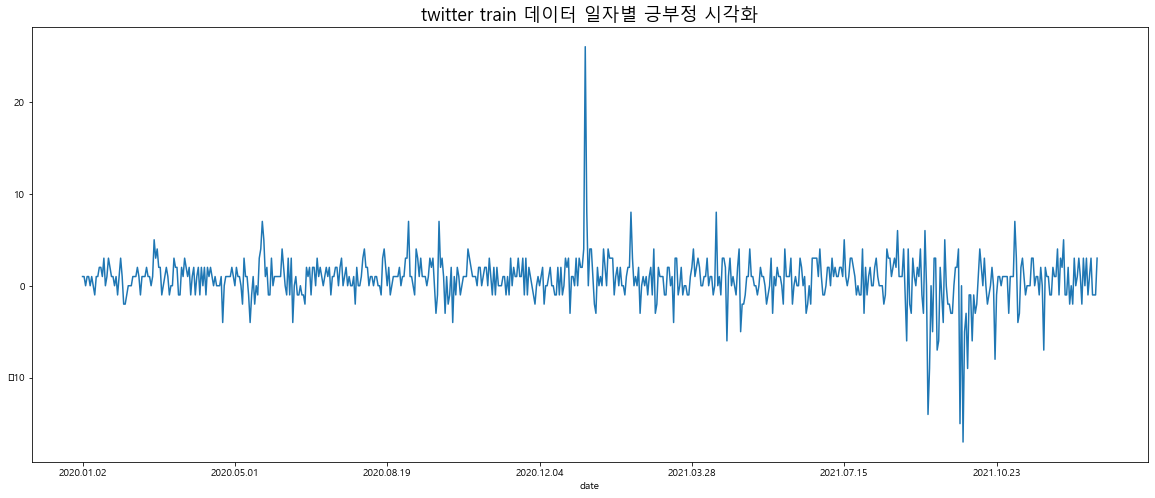

In [147]:
### 트위터
twitter_train['senti']= twitter_train['senti'].astype(int)
twitter_train['senti'][0].dtype

plt.figure(figsize=(20,8))
plt.title("twitter train 데이터 일자별 긍부정 시각화", fontsize=18)
twitter_train.groupby('date')['senti'].sum().plot()

### train data 모두 결합 및 일자별 그룹화

In [12]:
# 컬럼 이름 모두 같음
print(news_train.columns)
print(talk_train.columns)
print(view_train.columns)
print(twitter_train.columns)

Index(['date', 'text', 'score', 'senti'], dtype='object')
Index(['date', 'text', 'score', 'senti'], dtype='object')
Index(['date', 'text', 'score', 'senti'], dtype='object')
Index(['date', 'text', 'score', 'senti'], dtype='object')


In [13]:
# 데이터 타입 확인
twitter_train['senti'][0].dtype

AttributeError: 'str' object has no attribute 'dtype'

In [14]:
news_train['senti']= news_train['senti'].astype(int)
news_train['senti'][0].dtype

dtype('int32')

In [15]:
total_train = pd.concat([news_train, talk_train, view_train, twitter_train])
total_train

,date,text,score,senti
0,2020.01.01,네이버카카오 작년 연매출 사상최대,1,1
1,2020.01.01,한진네이버카카오두산…국민연금 수익률 ‘효자’,2,1
2,2020.01.01,백브리핑 돈보다 금배지,1,1
3,2020.01.01,게임위 GO 애플 STOP19금 게임 이중검열 논란,-2,-1
4,2020.01.01,달린 거리만큼 보험료 내는 ‘디지털 車보험’ 나온다,0,0
...,...,...,...,...
8,2021.12.30,크립토시대 네이버페이 말고 라인코인 카카오페이말고 클레이 원화충전결제에서 코인...,5,1
3,2021.12.31,해시드벤처스는 년 설립하자마자 운용사 출자금과 민간자금만으로 이루어진 ...,3,1
2,2021.12.31,해 넘긴 김범수 의장의 약속 카카오 상생안 오리무중 ...,4,1
1,2021.12.31,올해 다 지나니까 생각나는데 여름에 새일센터에서 구직 프로그램 소개 받을 때 카카오...,0,0


In [19]:
total_train['senti']= total_train['senti'].astype(int)
total_train['senti'][0].dtype

dtype('int32')

In [20]:
total_train.to_csv('./data/합치기테스트.csv') # --> 알아서 일자별로 묶여 들어갔음!!

In [21]:
# 일자별 그룹화 시도
print(len(total_train))

total_train.groupby('date')['senti'].size()  # 일자별 그룹화 개수

116370


date
2020.01.01      9
2020.01.02      5
2020.01.03     10
2020.01.04      2
2020.01.05      8
             ... 
2021.12.27    120
2021.12.28    124
2021.12.29    112
2021.12.30    138
2021.12.31     44
Name: senti, Length: 731, dtype: int64

In [22]:
total_train.groupby('date')['senti'].sum()  # 일자별 긍부정 점수 합

date
2020.01.01     5
2020.01.02     3
2020.01.03    -4
2020.01.04    -1
2020.01.05     1
              ..
2021.12.27    -4
2021.12.28   -13
2021.12.29    -3
2021.12.30    -4
2021.12.31     2
Name: senti, Length: 731, dtype: int32

<AxesSubplot:title={'center':'train 데이터 일자별 긍부정 시각화'}, xlabel='date', ylabel='일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치'>

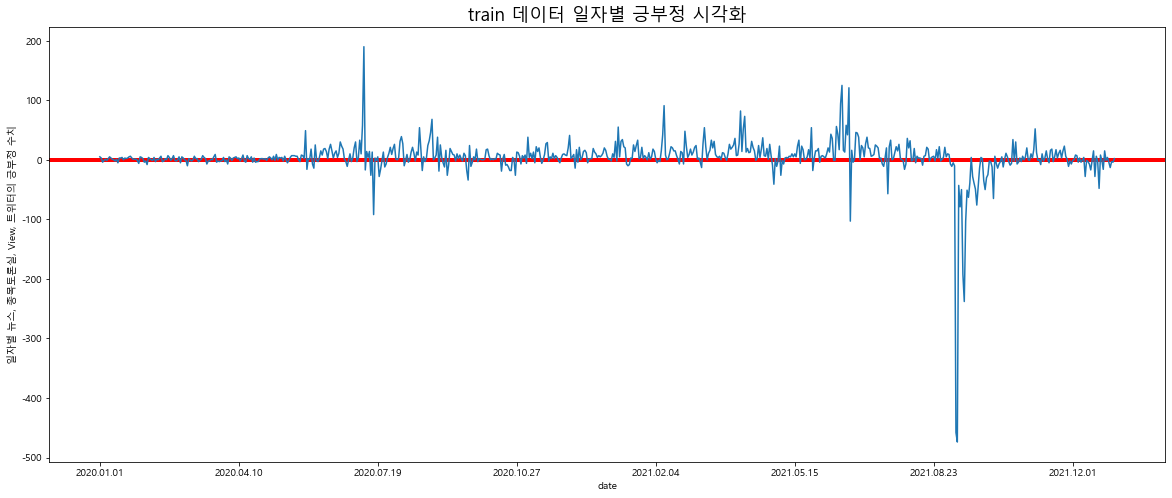

In [23]:
### 일자별 senti 합 그래프
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐 방지
plt.figure(figsize=(20,8))
plt.title("train 데이터 일자별 긍부정 시각화", fontsize=18)
plt.ylabel('일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치')
plt.axhline(y=0, color='r', linewidth=4)
total_train.groupby('date')['senti'].sum().plot()

<AxesSubplot:title={'center':'train 데이터 일자별 긍부정 시각화'}, xlabel='date', ylabel='일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치'>

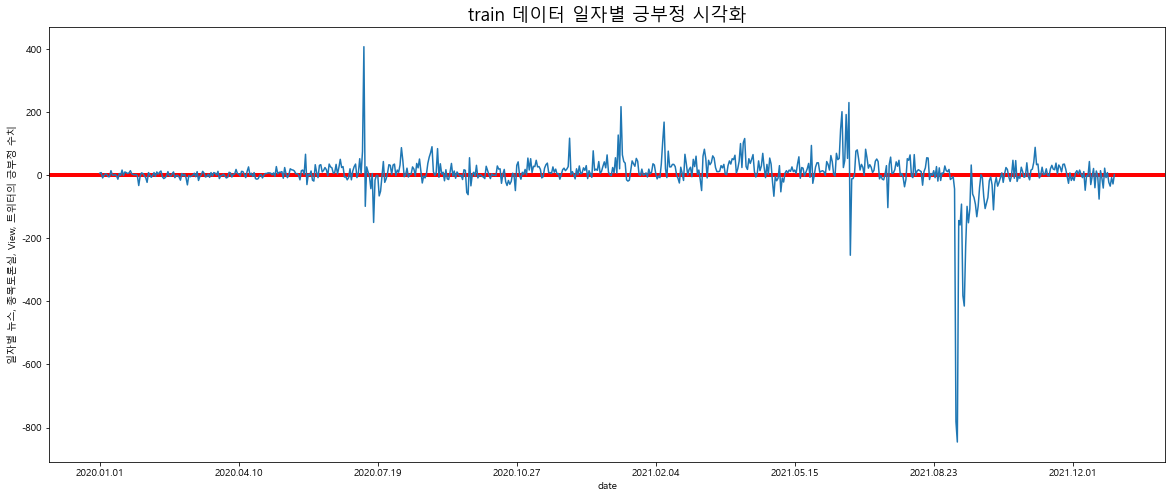

In [24]:
### 일자별 score 합 그래프
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐 방지
plt.figure(figsize=(20,8))
plt.title("train 데이터 일자별 긍부정 시각화", fontsize=18)
plt.ylabel('일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치')
plt.axhline(y=0, color='r', linewidth=4)
total_train.groupby('date')['score'].sum().plot()

In [25]:
### senti 합으로 가장 수치가 높은 날과 낮은 날 뽑기
x = total_train.groupby('date')['senti'].sum()
x = pd.DataFrame(x)
x = x.reset_index()
x[x['senti'] == total_train.groupby('date')['senti'].sum().min()]
# 가장 수치가 낮은 날 : 21.9.9

x[x['senti'] == total_train.groupby('date')['senti'].sum().max()]
# 가장 수치가 높은 날 : 20.7.9

,date,senti
190,2020.07.09,190


In [26]:
### score 합으로 가장 수치가 높은 날과 낮은 날 뽑기
x = total_train.groupby('date')['score'].sum()
x = pd.DataFrame(x)
x = x.reset_index()
x[x['score'] == total_train.groupby('date')['score'].sum().min()]
# 가장 수치가 낮은 날 : 21.9.9

x[x['score'] == total_train.groupby('date')['score'].sum().max()]
# 가장 수치가 높은 날 : 20.7.9

,date,score
190,2020.07.09,407


### test 데이터도 똑같이 진행

In [27]:
total_test = pd.concat([news_test, talk_test, view_test, twitter_test])
total_test

,date,text,score,senti
0,2022.01.02,‘신규확진 7천명’인데…오미크론 대응 준비 안 된 ‘호흡기 클리닉’,-1,-1
1,2022.01.02,한화손보 모바일 가입 간소화…디지털 전용 운전자보험 판매,1,1
2,2022.01.02,제2의 아이유 꿈꾸나…윤종신이 찍은 LG 가상인간 싱어송라이터 래아,0,0
3,2022.01.02,해진공 한국형 컨테이너 운임지수 시범 도입SCFI 넘을까,0,0
4,2022.01.03,류영준 카카오 대표 내정자 사퇴,-2,-1
...,...,...,...,...
4,2022.04.12,전세계 매출 위 앱 개발사에 기업 곳 엔씨 넷마블 카카오 포함 다음뉴...,1,1
3,2022.04.12,지금 모 행 간식쿠폰 준대 커피부터 치킨까지 커피 편의점 치킨 쿠폰 랜덤...,-1,-1
2,2022.04.12,충격 국민연금 중국에 조원 투자 기업에 조원 투자한 국민연금...,-2,-1
1,2022.04.12,구글 애플의 갑질은 금지해야 하지만 네이버 카카오의 갑질은 그대로 놔두자고 주장하...,1,1


In [28]:
print(len(total_test))
total_test.groupby('date')['senti'].size()

26813


date
2022.01.01     17
2022.01.02     24
2022.01.03     89
2022.01.04    228
2022.01.05    667
             ... 
2022.04.23     71
2022.04.24     59
2022.04.25    356
2022.04.26    286
2022.04.27    421
Name: senti, Length: 117, dtype: int64

In [29]:
total_test['senti']= total_test['senti'].astype(int)
total_test['senti'][0].dtype

dtype('int32')

<AxesSubplot:title={'center':'test 데이터 일자별 긍부정 시각화'}, xlabel='date', ylabel='일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치'>

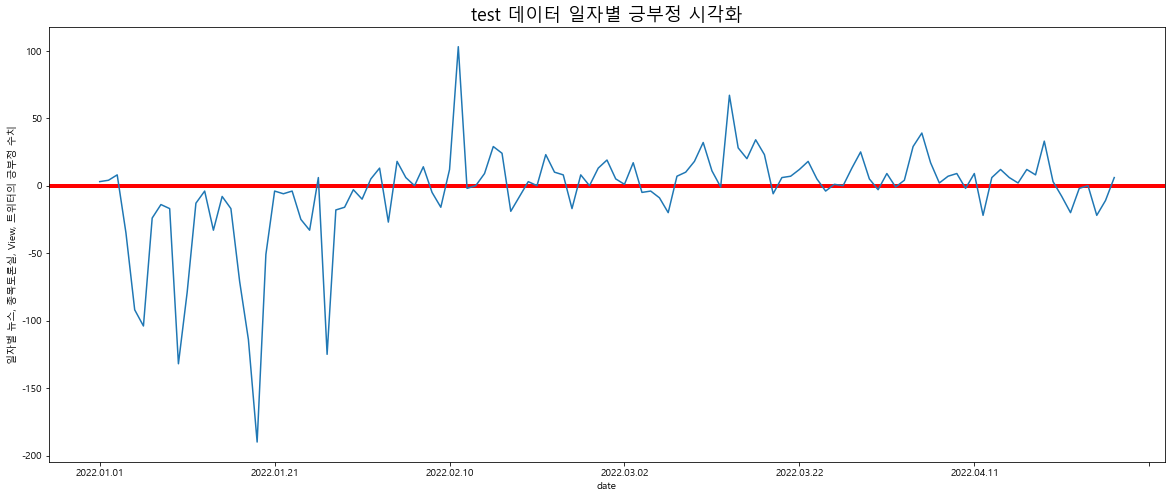

In [30]:
### senti 합
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐 방지
plt.figure(figsize=(20,8))
plt.title("test 데이터 일자별 긍부정 시각화", fontsize=18)
plt.ylabel('일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치')
plt.axhline(y=0, color='r', linewidth=4)
total_test.groupby('date')['senti'].sum().plot()

<AxesSubplot:title={'center':'test 데이터 일자별 긍부정 시각화'}, xlabel='date', ylabel='일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치'>

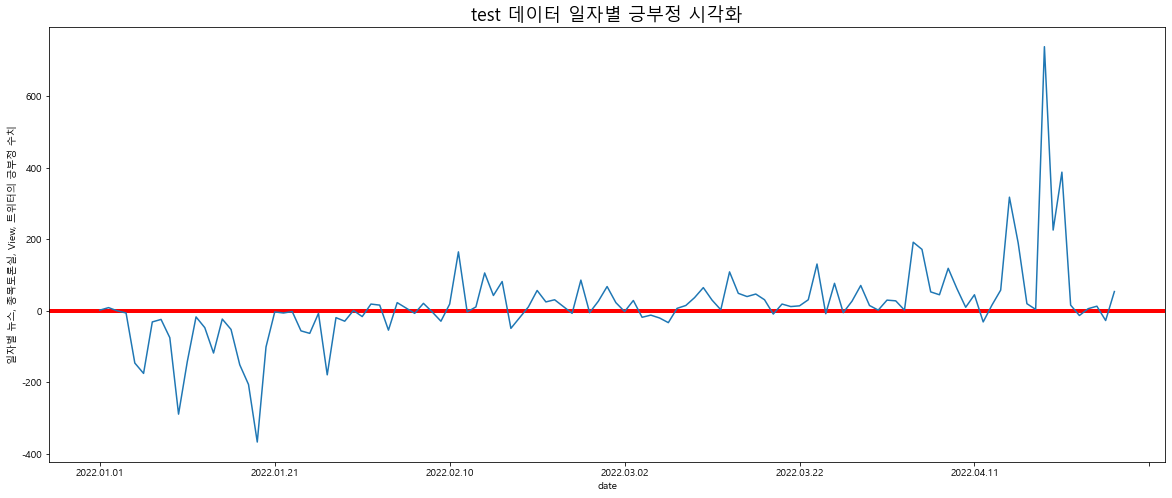

In [31]:
### 일자별 score 합 그래프
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐 방지
plt.figure(figsize=(20,8))
plt.title("test 데이터 일자별 긍부정 시각화", fontsize=18)
plt.ylabel('일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치')
plt.axhline(y=0, color='r', linewidth=4)
total_test.groupby('date')['score'].sum().plot()

In [32]:
### senti 합으로 가장 수치가 높은 날과 낮은 날 뽑기
x = total_test.groupby('date')['senti'].sum()
x = pd.DataFrame(x)
x = x.reset_index()
x
x[x['senti'] == total_test.groupby('date')['senti'].sum().min()]
# 가장 수치가 낮은 날 : 22.1.19

x[x['senti'] == total_test.groupby('date')['senti'].sum().max()]
# 가장 수치가 높은 날 : 22.2.11

,date,senti
41,2022.02.11,103


In [33]:
### score 합으로 가장 수치가 높은 날과 낮은 날 뽑기
x = total_test.groupby('date')['score'].sum()
x = pd.DataFrame(x)
x = x.reset_index()
x
x[x['score'] == total_test.groupby('date')['score'].sum().min()]
# 가장 수치가 낮은 날 : 22.1.19

x[x['score'] == total_test.groupby('date')['score'].sum().max()]
# 가장 수치가 높은 날 : 22.4.19  --> 얘만 다르게 나옴!!

,date,score
108,2022.04.19,739


### train, test 합쳐서 해보기

In [34]:
total = pd.concat([total_train, total_test], ignore_index = True)
total

,date,text,score,senti
0,2020.01.01,네이버카카오 작년 연매출 사상최대,1,1
1,2020.01.01,한진네이버카카오두산…국민연금 수익률 ‘효자’,2,1
2,2020.01.01,백브리핑 돈보다 금배지,1,1
3,2020.01.01,게임위 GO 애플 STOP19금 게임 이중검열 논란,-2,-1
4,2020.01.01,달린 거리만큼 보험료 내는 ‘디지털 車보험’ 나온다,0,0
...,...,...,...,...
143178,2022.04.12,전세계 매출 위 앱 개발사에 기업 곳 엔씨 넷마블 카카오 포함 다음뉴...,1,1
143179,2022.04.12,지금 모 행 간식쿠폰 준대 커피부터 치킨까지 커피 편의점 치킨 쿠폰 랜덤...,-1,-1
143180,2022.04.12,충격 국민연금 중국에 조원 투자 기업에 조원 투자한 국민연금...,-2,-1
143181,2022.04.12,구글 애플의 갑질은 금지해야 하지만 네이버 카카오의 갑질은 그대로 놔두자고 주장하...,1,1


In [35]:
total.to_csv('./data/합친파일.csv')

<AxesSubplot:title={'center':'train+test 데이터 일자별 긍부정 시각화'}, xlabel='date', ylabel='일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치'>

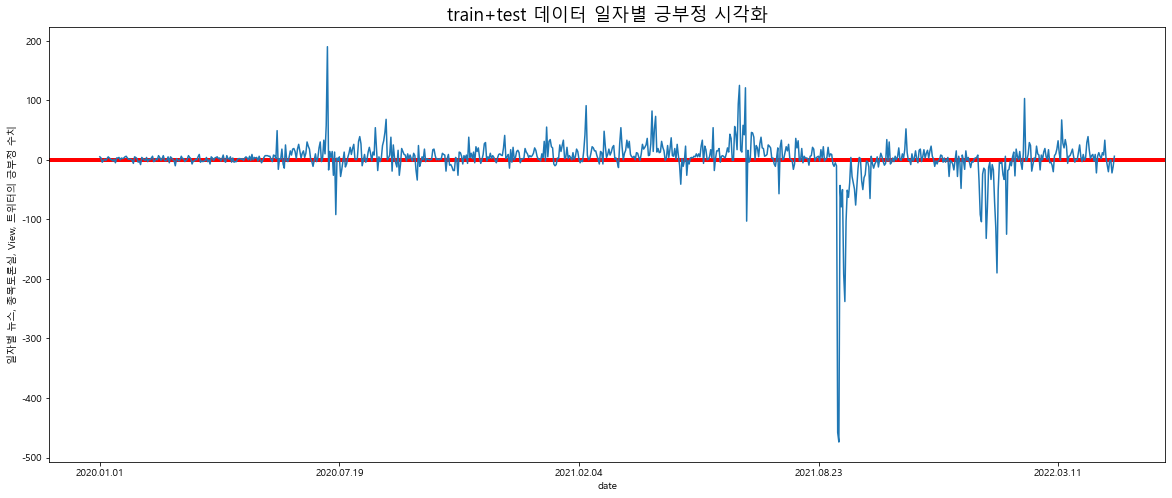

In [36]:
### 일자별 senti 합 그래프
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐 방지
plt.figure(figsize=(20,8))
plt.title("train+test 데이터 일자별 긍부정 시각화", fontsize=18)
plt.ylabel('일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치')
plt.axhline(y=0, color='r', linewidth=4)
total.groupby('date')['senti'].sum().plot()

In [37]:
total

,date,text,score,senti
0,2020.01.01,네이버카카오 작년 연매출 사상최대,1,1
1,2020.01.01,한진네이버카카오두산…국민연금 수익률 ‘효자’,2,1
2,2020.01.01,백브리핑 돈보다 금배지,1,1
3,2020.01.01,게임위 GO 애플 STOP19금 게임 이중검열 논란,-2,-1
4,2020.01.01,달린 거리만큼 보험료 내는 ‘디지털 車보험’ 나온다,0,0
...,...,...,...,...
143178,2022.04.12,전세계 매출 위 앱 개발사에 기업 곳 엔씨 넷마블 카카오 포함 다음뉴...,1,1
143179,2022.04.12,지금 모 행 간식쿠폰 준대 커피부터 치킨까지 커피 편의점 치킨 쿠폰 랜덤...,-1,-1
143180,2022.04.12,충격 국민연금 중국에 조원 투자 기업에 조원 투자한 국민연금...,-2,-1
143181,2022.04.12,구글 애플의 갑질은 금지해야 하지만 네이버 카카오의 갑질은 그대로 놔두자고 주장하...,1,1


<AxesSubplot:title={'center':'total 일자별 긍부정 시각화'}, xlabel='date', ylabel='일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치'>

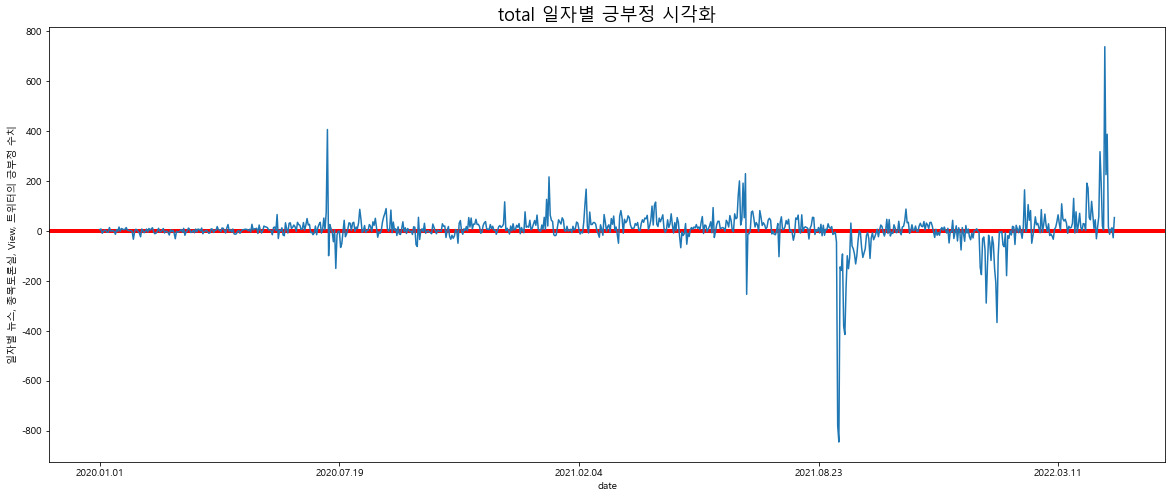

In [39]:
### 일자별 score 합 그래프
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐 방지
plt.figure(figsize=(20,8))
plt.title("total 일자별 긍부정 시각화", fontsize=18)
plt.ylabel('일자별 뉴스, 종목토론실, View, 트위터의 긍부정 수치')
plt.axhline(y=0, color='r', linewidth=4)
total.groupby('date')['score'].sum().plot()

In [271]:
### senti 합으로 가장 수치가 높은 날과 낮은 날 뽑기
x = total.groupby('date')['senti'].sum()
x = pd.DataFrame(x)
x = x.reset_index()
x
x[x['senti'] == total.groupby('date')['senti'].sum().min()]
# 가장 수치가 낮은 날 : 21.9.9

x[x['senti'] == total.groupby('date')['senti'].sum().max()]
# 가장 수치가 높은 날 : 20.7.9

,date,senti
617,2021.09.09,-474


In [40]:
### score 합으로 가장 수치가 높은 날과 낮은 날 뽑기
x = total.groupby('date')['score'].sum()
x = pd.DataFrame(x)
x = x.reset_index()
x
x[x['score'] == total.groupby('date')['score'].sum().min()]
# 가장 수치가 낮은 날 : 21.9.9

x[x['score'] == total.groupby('date')['score'].sum().max()]
# 가장 수치가 높은 날 : 22.4.19

,date,score
839,2022.04.19,739
